<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

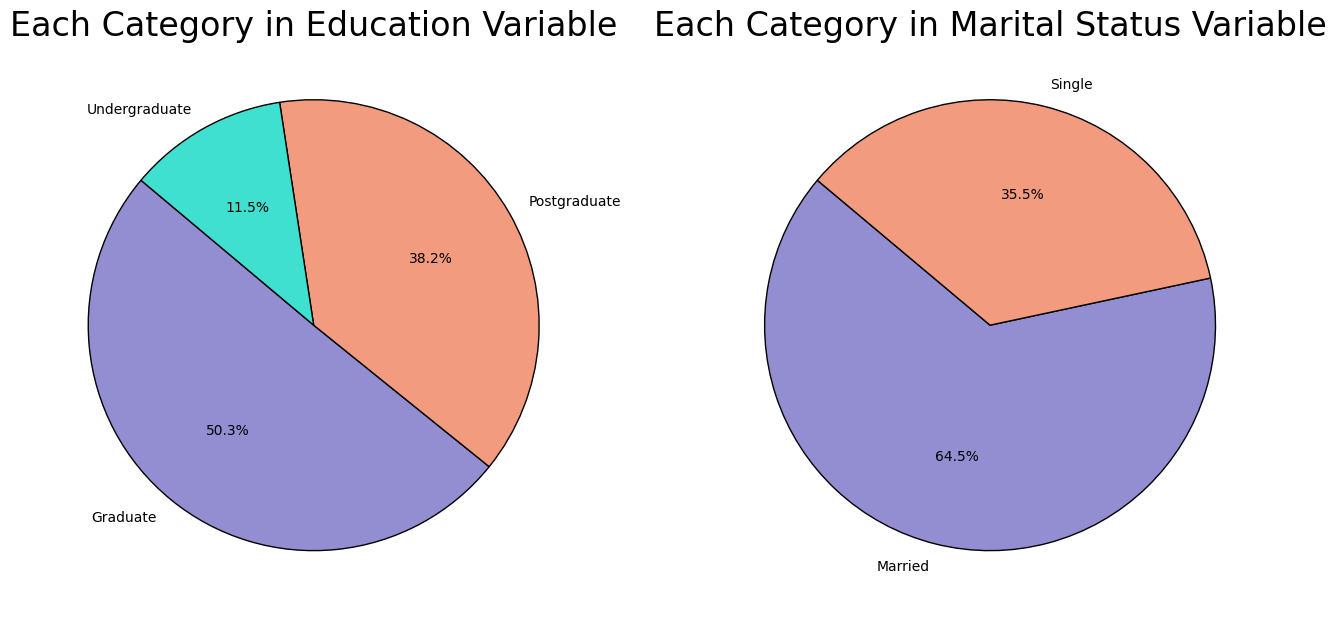

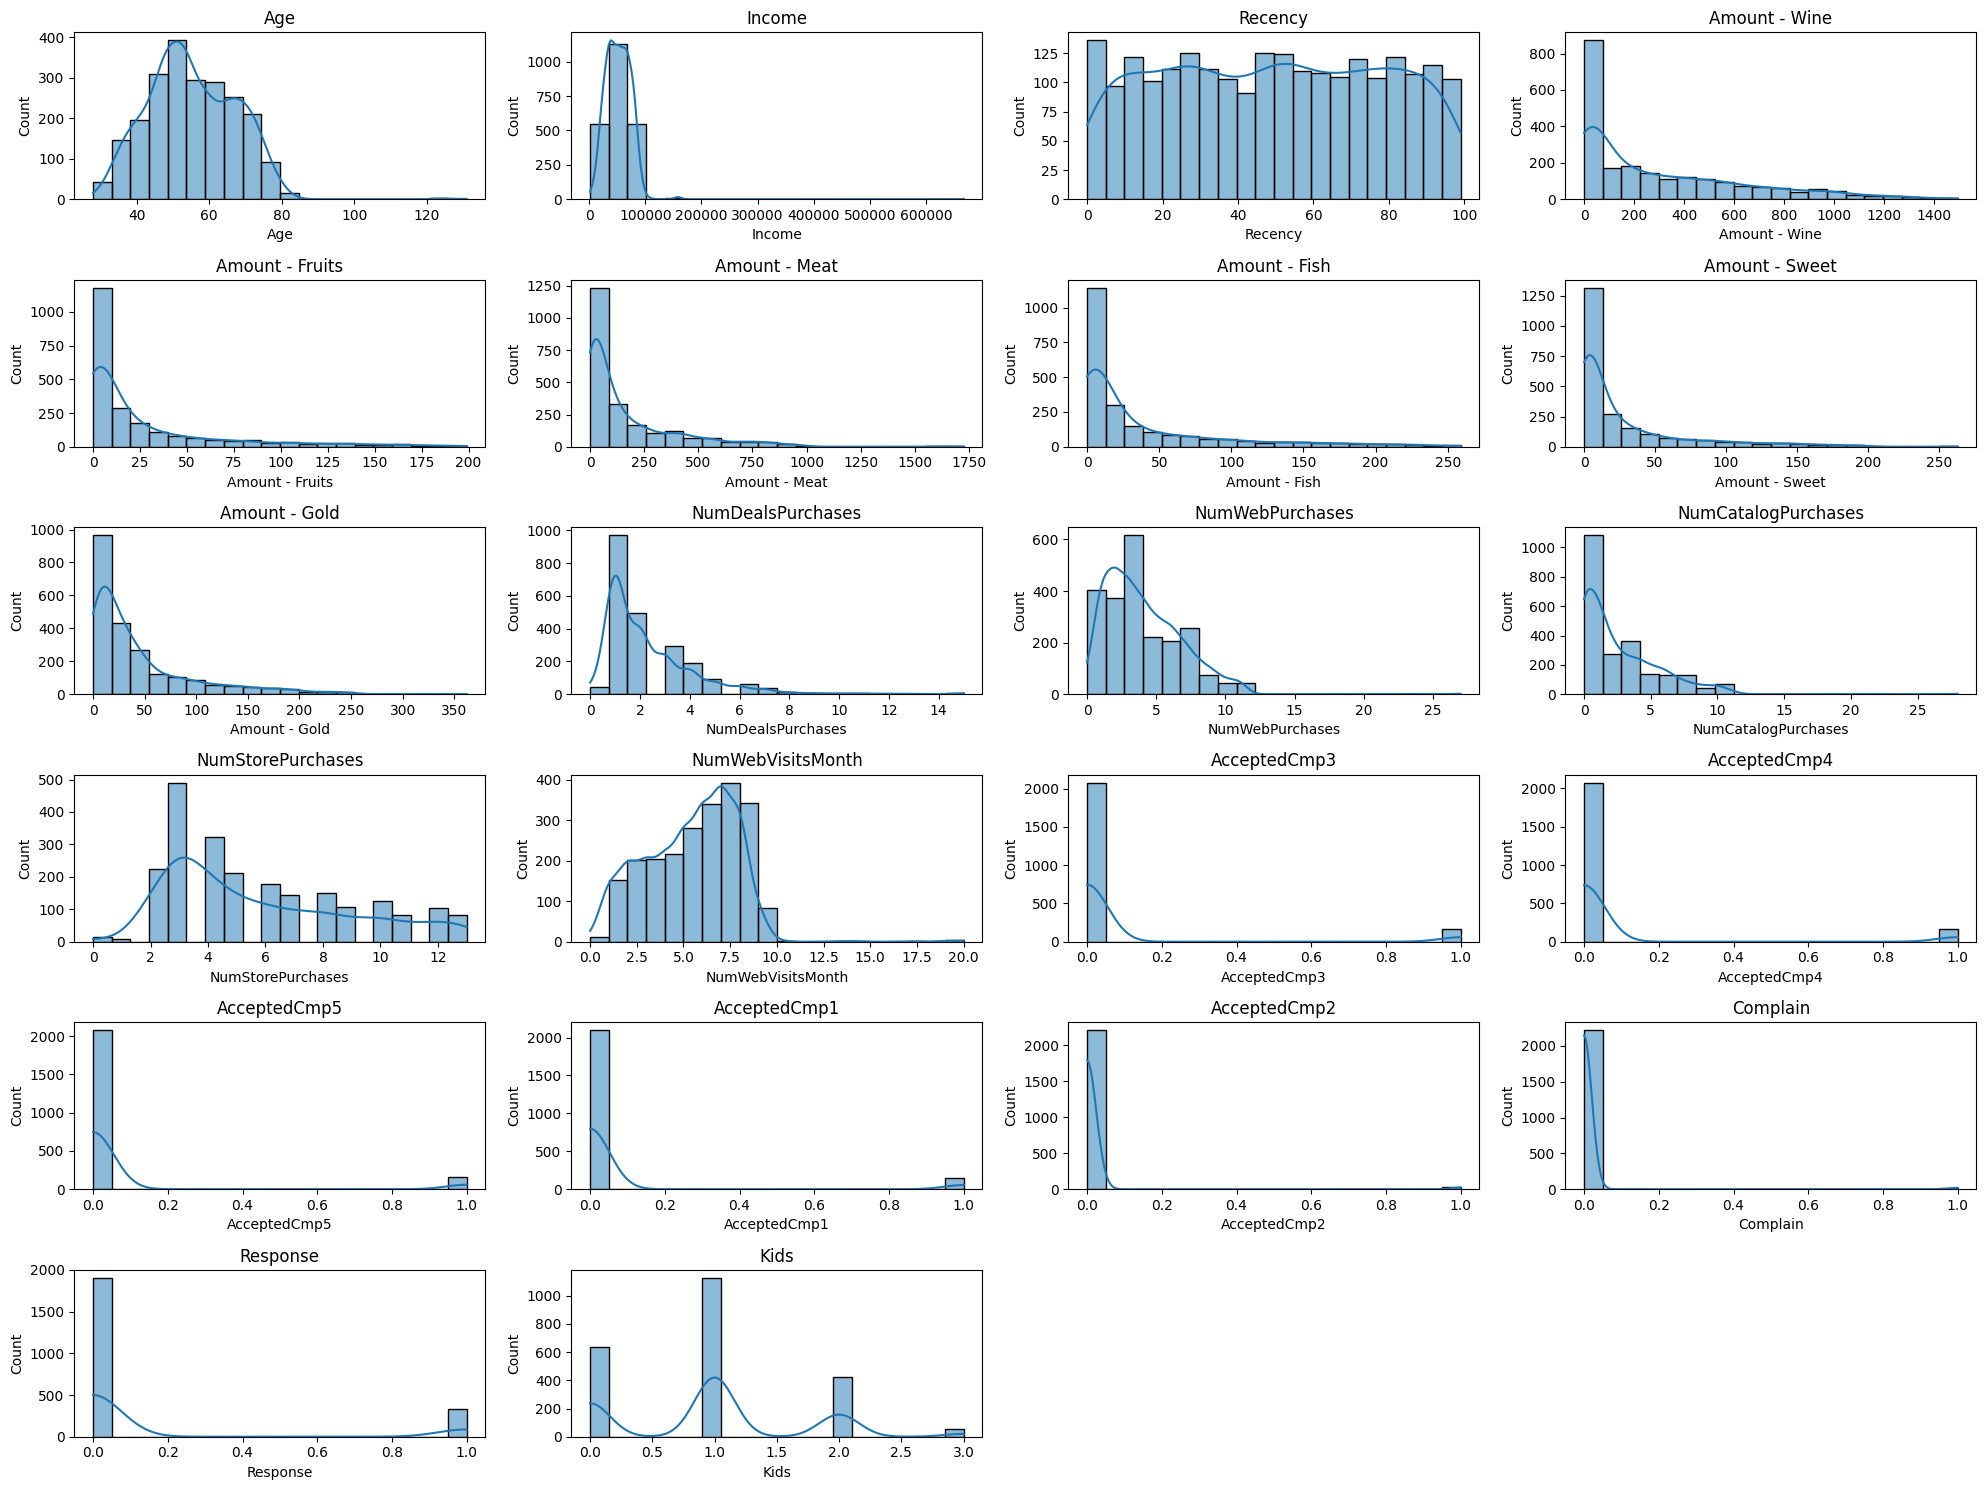

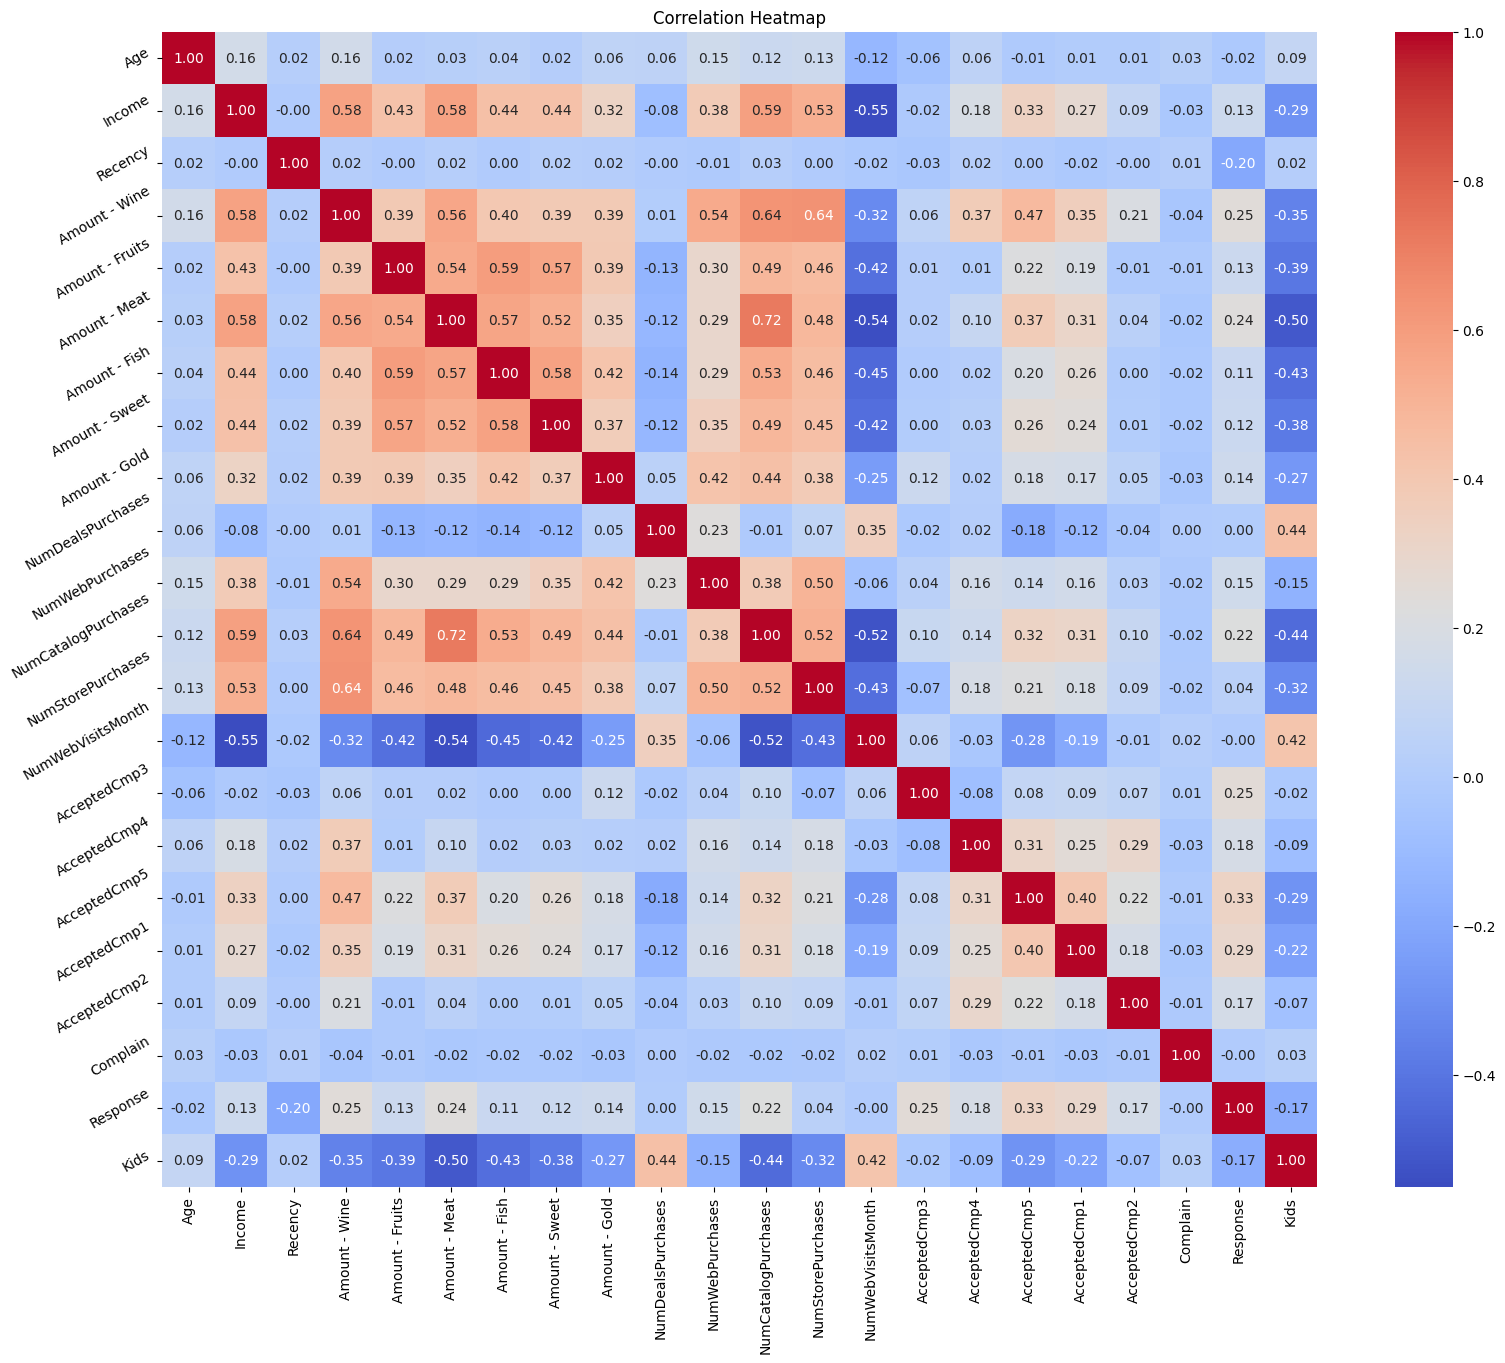

Accuracy: 0.885
Confusion Matrix:
 [[564  13]
 [ 64  31]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       577
         1.0       0.70      0.33      0.45        95

    accuracy                           0.89       672
   macro avg       0.80      0.65      0.69       672
weighted avg       0.87      0.89      0.87       672

Optimization terminated successfully.
         Current function value: 0.281541
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2216
Method:                           MLE   Df Model:                           23
Date:                Wed, 25 Sep 2024   Pseudo R-squ.:                  0.3315
Time:                        20:55:26   Log-Likelihood:                -630.65
converged:     

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

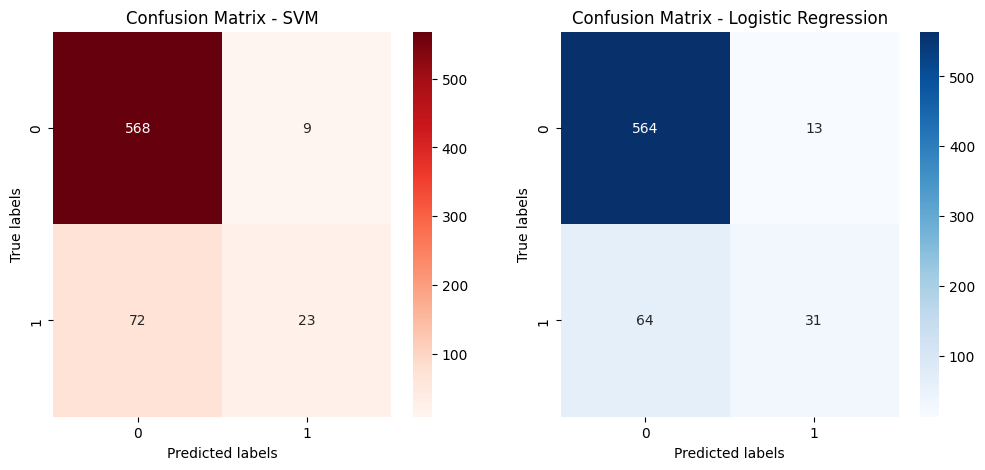

In [1]:
# %%
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# %%
marketing = pd.read_excel("/kaggle/input/marketing/marketing_campaign.xlsx", header=0)

# %%
marketing.head()

# %%
marketing.info()

# %%
marketing.shape

# %%
marketing.columns

# %%
marketing.dtypes

# %%
marketing.describe().T

# %%
marketing.isnull().sum()

# %%
marketing.isna().sum()

# %%
marketing['Income'] = marketing['Income'].fillna(value=marketing["Income"].mean())
marketing

# %%
marketing = marketing.drop_duplicates()
marketing.shape

# %%
marketing["Year_Birth"] = 2024-marketing["Year_Birth"]
marketing = marketing.rename(columns={
    "Year_Birth": "Age"})

# %%
marketing = marketing.drop(['ID','Z_CostContact','Z_Revenue','Dt_Customer'], axis=1)

# %%
marketing["Education"] = marketing["Education"].map(lambda x: "Undergraduate" if x in ["Basic", "2n Cycle"] 
                                          else "Graduate" if x == "Graduation" 
                                          else "Postgraduate" if x in ["Master", "PhD"] 
                                          else x) 

# %%
marketing['Marital_Status'] = marketing['Marital_Status'].map(lambda x: 'Single' if x in ['Alone', 'YOLO', 'Absurd','Widow','Divorced'] 
                                                else 'Married' if x == 'Together' 
                                                else x)

# %%
marketing['Kids'] = marketing['Kidhome'] + marketing['Teenhome']
marketing = marketing.drop(['Kidhome','Teenhome'], axis=1)

# %%
marketing = marketing.rename(columns={
    "MntWines": "Amount - Wine","MntFruits": "Amount - Fruits","MntMeatProducts": "Amount - Meat","MntFishProducts": "Amount - Fish","MntSweetProducts": "Amount - Sweet","MntGoldProds": "Amount - Gold"})


# %%
marketing

# %%
education_counts = marketing['Education'].value_counts()
married_counts = marketing['Marital_Status'].value_counts()
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1) 
plt.pie(education_counts, labels=education_counts.index, colors=['#938dd2', '#F39B7FFF', 'turquoise'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black', linewidth=1))
plt.title("Each Category in Education Variable", fontsize=24)

plt.subplot(1, 2, 2) 
plt.pie(married_counts, labels=married_counts.index, colors=['#938dd2', '#F39B7FFF'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black', linewidth=1))
plt.title("Each Category in Marital Status Variable", fontsize=24)

plt.show()

# %%
numerical_columns = marketing.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 15))
for feature in numerical_columns:
    plt.subplot(6, 4, numerical_columns.to_list().index(feature) + 1)
    sns.histplot(data=marketing[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Select only numeric columns for correlation
numeric_columns = marketing.select_dtypes(include=['number']).columns

# %%
if len(numeric_columns) > 0:
    correlation_matrix = marketing[numeric_columns].corr()

    # Create heatmap
    plt.figure(figsize=(20, 15))
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    ax = sns.heatmap(correlation_matrix, annot=True, square=True, fmt='.2f', linecolor='black', cmap=cmap)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation.")


# %%
marketing.dtypes

# %%
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = marketing.select_dtypes(include=['object']).columns
for col in categorical_cols:
    marketing[col] = label_encoder.fit_transform(marketing[col])

# %%
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
marketing[numerical_columns] = scaler.fit_transform(marketing[numerical_columns])
marketing

# %%
from sklearn.model_selection import train_test_split
X = marketing.drop('Response', axis=1)
y = marketing['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# %%
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

# %%
import statsmodels.api as sm
X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

# %%
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {svm_accuracy:.3f}")
print("Confusion Matrix:\n", svm_conf_matrix)
print("Classification Report:\n", svm_report)

# %%
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Reds', ax=ax1)
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Confusion Matrix - SVM')

sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Confusion Matrix - Logistic Regression')

# %%